# 1. Kaggle Dimaond Prices 데이터셋 다운로드

In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download shivam2503/diamonds -p ./ --unzip

Dataset URL: https://www.kaggle.com/datasets/shivam2503/diamonds
License(s): unknown
  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 81.9MB/s]


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('./diamonds.csv', index_col = 0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 2. 데이터셋 정보

In [5]:
print("데이터 개수:",len(df))
print("속성 종류:", df.columns.values)

데이터 개수: 53940
속성 종류: ['carat' 'cut' 'color' 'clarity' 'depth' 'table' 'price' 'x' 'y' 'z']


데이터셋의 전체적인 구조

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


수치형 변수들의 기초 통계 정보

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


수치형 변수들의 값 분포 시각화

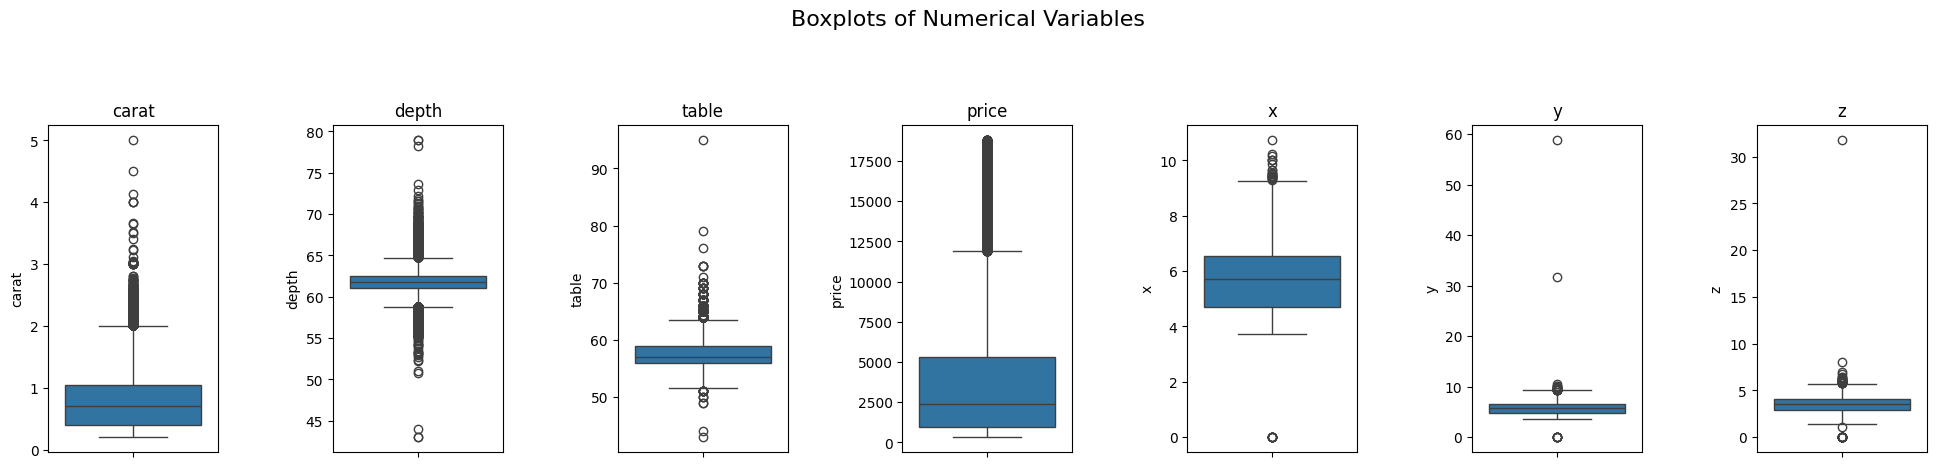

In [8]:
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
fig.suptitle('Boxplots of Numerical Variables', fontsize=16)

numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

for idx, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[idx])
    axes[idx].set_title(col)

plt.tight_layout(pad=3.0)
plt.show()

범주형 변수들의 기초 통계 정보

In [9]:
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()

for col in categorical_columns:
    print(df[col].value_counts())
    print()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64



범주형 변수들의 값 분포 시각화

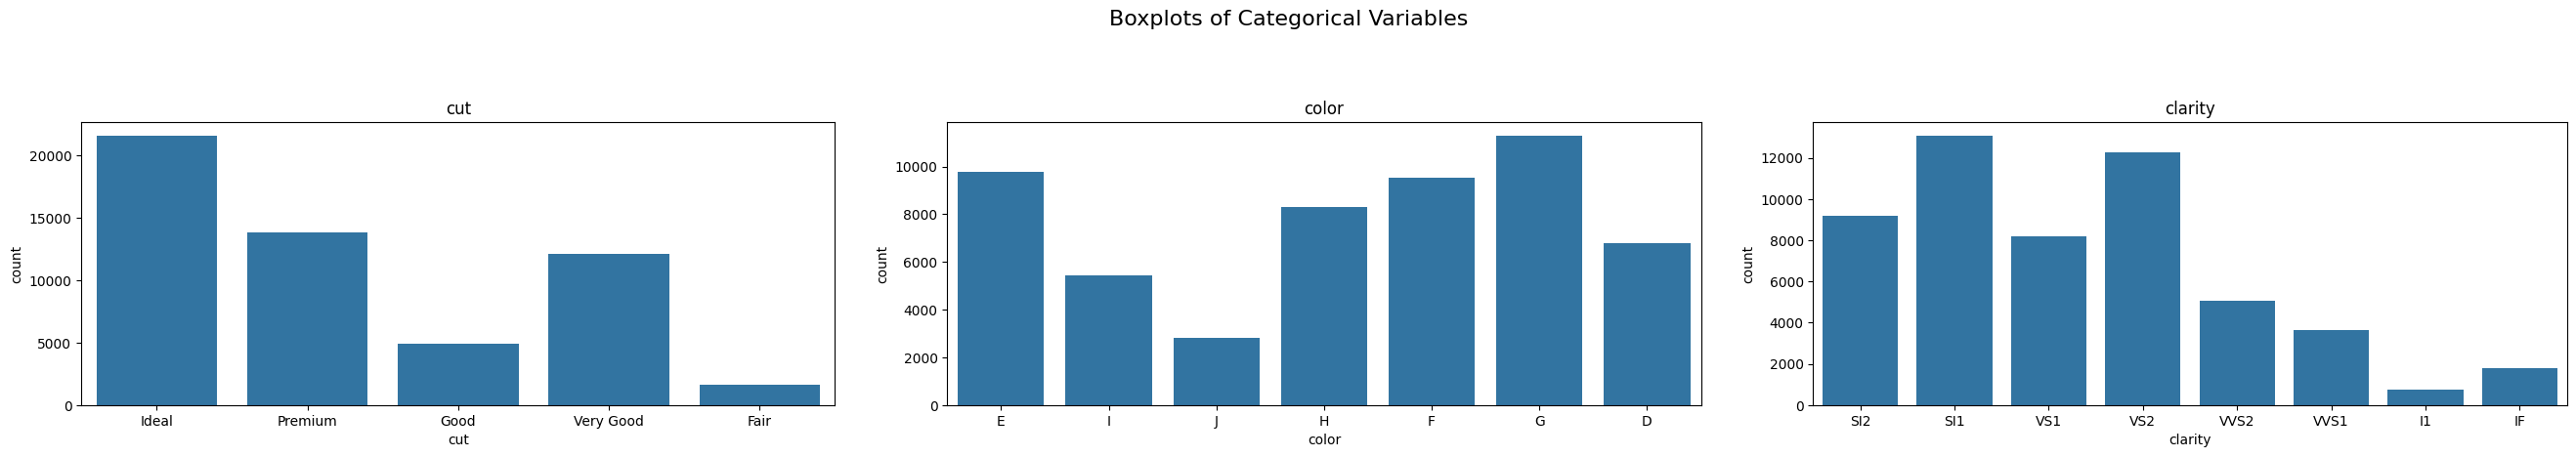

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(27, 5))
fig.suptitle('Boxplots of Categorical Variables', fontsize=16)

for idx, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[idx])
    axes[idx].set_title(col)

plt.tight_layout(pad=3.0)
plt.show()

위에서 얻은 데이터를 요약하면 다음과 같습니다.  

|변수명|설명|
|------|---|
|carat|다이아몬드의 중량 (0.2에서 5.01 캐럿 사이)|
|cut|다이아몬드의 컷 품질 (Fair, Good, Very Good, Premium, Ideal)|
|color| 다이아몬드 색상 (J에서 D까지, D가 가장 좋은 색상)|
|clarity|다이아몬드의 투명도 (I1 (가장 나쁜 정도)에서 IF (가장 좋은 정도)까지)|
|depth|다이아몬드의 총 깊이 비율 (z / (x + y)의 평균, 43% ~ 79% )|
|table| 다이아몬드 상단의 너비와 가장 넓은 지점의 비율 (43% ~ 95%)|
|price|다이아몬드 가격 (단위: 미국 달러, 326달러 ~ 18,823달러)|
|x|다이아몬드의 길이 (단위: mm, 0 ~ 10.74mm)|
|y|다이아몬드의 너비 (단위: mm, 0 ~ 58.9mm)|
|z|다이아몬드의 깊이 (단위: mm, 0 ~ 31.8mm)|

# 3. 이상치 제거

 "x", "y", "z" 값이 0인 데이터는 다이아몬드의 실제 물리적 크기를 나타내지 않으므로, 잘못된 입력이거나 비정상적인 데이터로 볼 수 있습니다.  
 따라서 이러한 값들을 이상치(outlier)로 간주하고 해당 데이터를 삭제해줍니다.

In [11]:
print("처리 전의 데이터 개수:", len(df))

df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

print("처리 후의 데이터 개수:", len(df))

처리 전의 데이터 개수: 53940
처리 후의 데이터 개수: 53920


수치형 변수들에 대한 regression 그래프를 살펴보면서 이상치로 의심되는 데이터를 찾아봅니다.

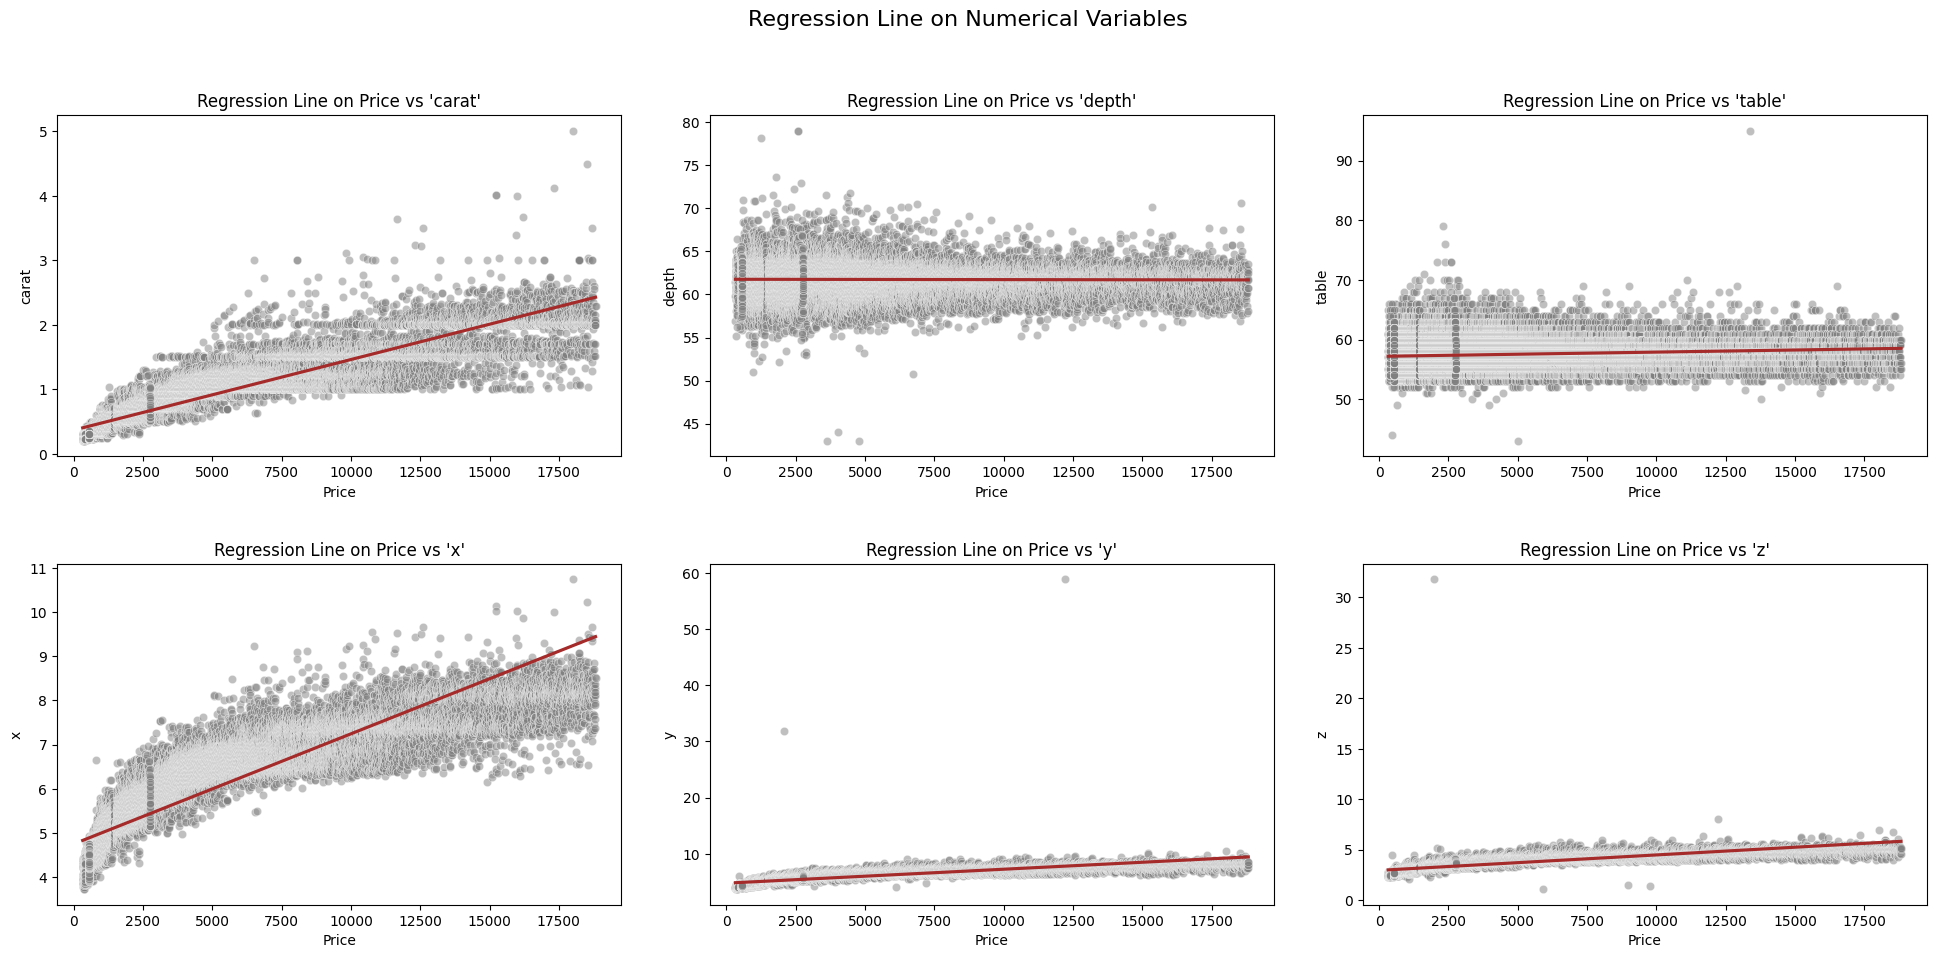

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Regression Line on Numerical Variables', fontsize=16)

if 'price' in numerical_columns:
    numerical_columns.remove('price')

for idx, col in enumerate(numerical_columns):
    ax = axes[idx // 3, idx % 3]
    sns.scatterplot(x='price', y=col, data=df, alpha=0.5, color='gray', ax=ax)
    sns.regplot(x='price', y=col, data=df, scatter=False, color='brown', ax=ax)
    ax.set_title(f"Regression Line on Price vs '{col}'")
    ax.set_xlabel("Price")
    ax.set_ylabel(f"{col}")

plt.tight_layout(pad=3.0)
plt.show()

depth와 table에서는 회귀선 근처에 위치한 데이터만 포함하도록 필터링하고,   
y와 z의 값이 다른 데이터에 비해 비정상적으로 큰 데이터도 제거합니다.

In [13]:
print("처리 전의 데이터 개수:", len(df))

df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]

print("처리 후의 데이터 개수:", len(df))

처리 전의 데이터 개수: 53920
처리 후의 데이터 개수: 53907


# 4. 변수들 간의 관계 조사

## (1) 수치형 변수들 간의 관계 시각화

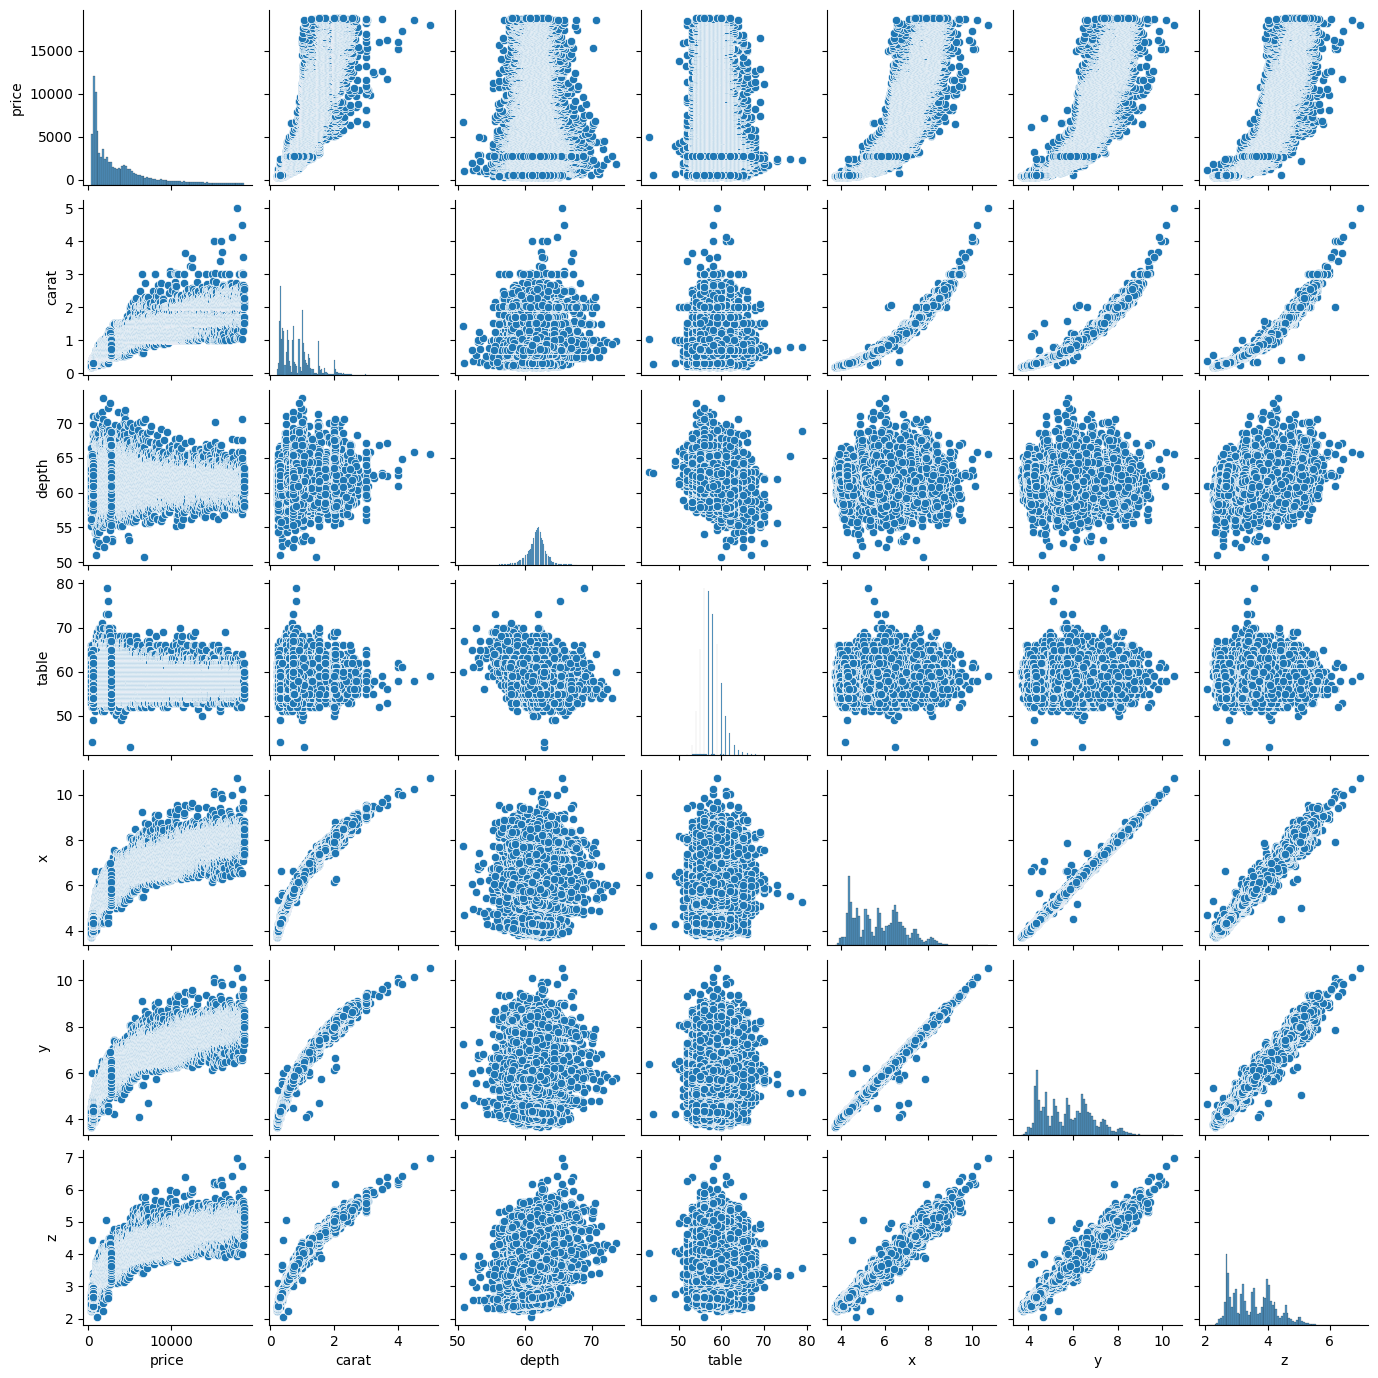

In [28]:
sns.pairplot(df[['price'] + numerical_columns], height=2, aspect=1)

- 가격(price)과 캐럿(carat)의 관계: 매우 강한 양의 상관관계가 관찰되며, 무게가 높을수록 가격이 높아지는 것을 볼 수 있습니다.

- 가격(price)과 치수(x, y, z)의 관계: 매우 강한 양의 상관관계가 관찰되며, 크기가 클수록 가격이 높아지는 것을 볼 수 있습니다.

- 캐럿(carat)과 치수(x, y, z)의 관계: 독립 변수들 간의 강한 상관관계가 확인되었습니다.   
원본 diamond prcies 데이터셋으로 모델을 학습시켰을 때 다중공선성 문제가 발생할 가능성을 내포하고 있습니다.

## (2) 변수들 간의 상관계수 값 비교

object 타입의 범주형 변수들의 레이블을 인코딩하여 int 타입으로 바꿔줍니다.

In [17]:
from sklearn.preprocessing import LabelEncoder

label_data = df.copy()

label_encoder = LabelEncoder()
for col in categorical_columns:
    label_data[col] = label_encoder.fit_transform(label_data[col])

label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

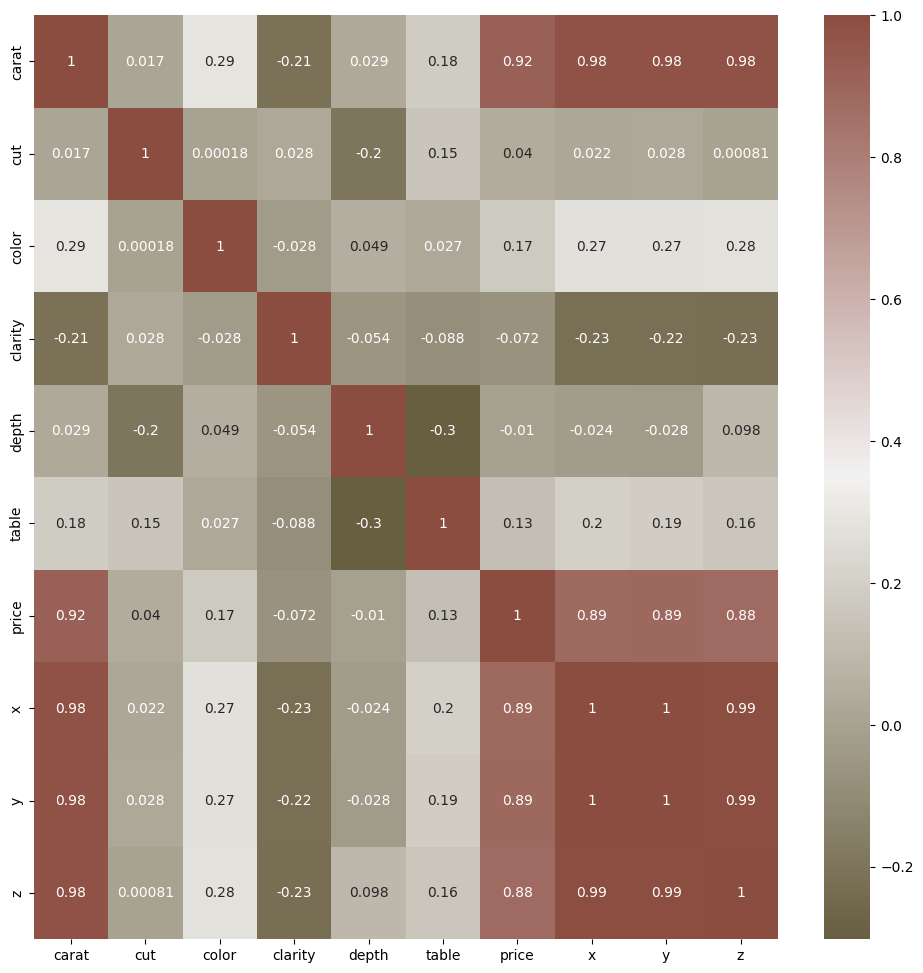

In [29]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

### 주요 상관관계
- 가격(price)과 캐럿(carat)의 상관계수는 0.92로, 매우 높은 양의 상관관계를 보입니다.
- 유사하게, 가격(price)과 치수(x, y, z)는 각각 0.89, 0.89, 0.88의 양의 상관관계를 보입니다.
- 반면, 가격(price)에 대한 커팅(cut), 색상(color), 투명도(clarity) 각각의 상관 계수는 모두 낮게 나왔습니다.   
  아마 범주형 변수에서 인코딩된 숫자 값이 실제 의미 있는 간격을 반영하지 않기 때문에, 연속형 변수 간 관계를 잘 포착하지 못해서 발생한 문제라고 생각합니다.  
  다음 코드에서는 가격과 범주형 변수들 간의 관계에 대해 시각화합니다.

## (3) 가격(price)과 범주형 변수들 간의 관계

가격과 세 가지 범주형 변수 간의 관계를 시각화하겠습니다.   

In [15]:
import warnings
warnings.filterwarnings('ignore') # palette 매개변수 사용 시에 뜨는 메세지를 보지 않기 위해 경고 메세지를 무시해줍니다.

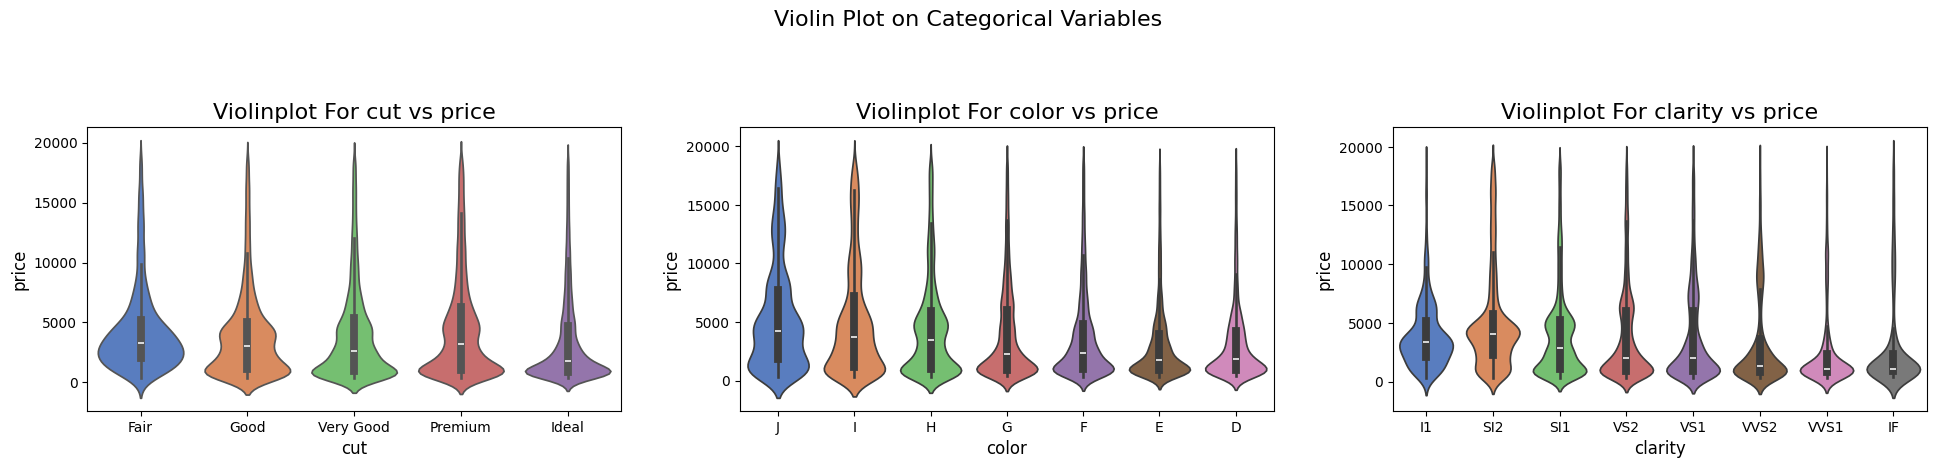

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Violin Plot on Categorical Variables', fontsize=16)

order = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
         ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
         ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]

for idx, col in enumerate(categorical_columns):
    ax = axes[idx]
    sns.violinplot(x=f'{col}', y='price', data=df, palette='muted', ax=ax, order=order[idx])
    ax.set_title(f"Violinplot For {col} vs price", fontsize=16)
    ax.set_xlabel(f"{col}", fontsize=12)
    ax.set_ylabel("price", fontsize=12)

plt.tight_layout(pad=3.0)
plt.show()

각 그래프는 해당 범주형 변수의 각 카테고리별 가격 분포를 보여줍니다.  
1. cut vs price  
- Fair 등급의 다이아몬드가 상대적으로 높은 중앙값을 가집니다.  
- Ideal은 중앙값은 낮지만 더 일관된 가격 분포를 보입니다.  
- 모든 등급에서의 값 범위가 크게 다르지 않은 것으로 보아 cut 이외의 변수들이 가격에 큰 영향을 미친다는 것을 알 수 있습니다.

2. color vs price
- J에서 D로 갈수록 분포가 좁아지는 것으로 보아 좋은 색상 등급에서 가격 변동성이 낮은 점을 확인할 수 있습니다.  
- 예상과는 달리 J에서 D로 갈수록 중앙값이 높아지지 않는 점을 고려하면, 색상이 가격에 큰 영향을 끼치지 않거나 분석 방법이 잘못되었다고 생각합니다.

3. clarity vs price
- 최상위 투명도 등급(VVS2, VVS1, IF) 간의 분포 차이가 뚜렷하지 않은 것을 보아 상위 등급에서는 투명도가 가격에 큰 영향을 끼치지 않는 것을 알 수 있습니다.
- 색상과 유사하게 I1에서 IF로 갈수록 중앙값이 높아지지 않는 점을 보아 투명도도 가격 선정에 크게 중요하지 않거나 분석 방법의 문제가 있을 것이라 생각합니다.

## (4) 가격(price)과 캐럿(carat) 간의 관계 (범주형 변수 기준)

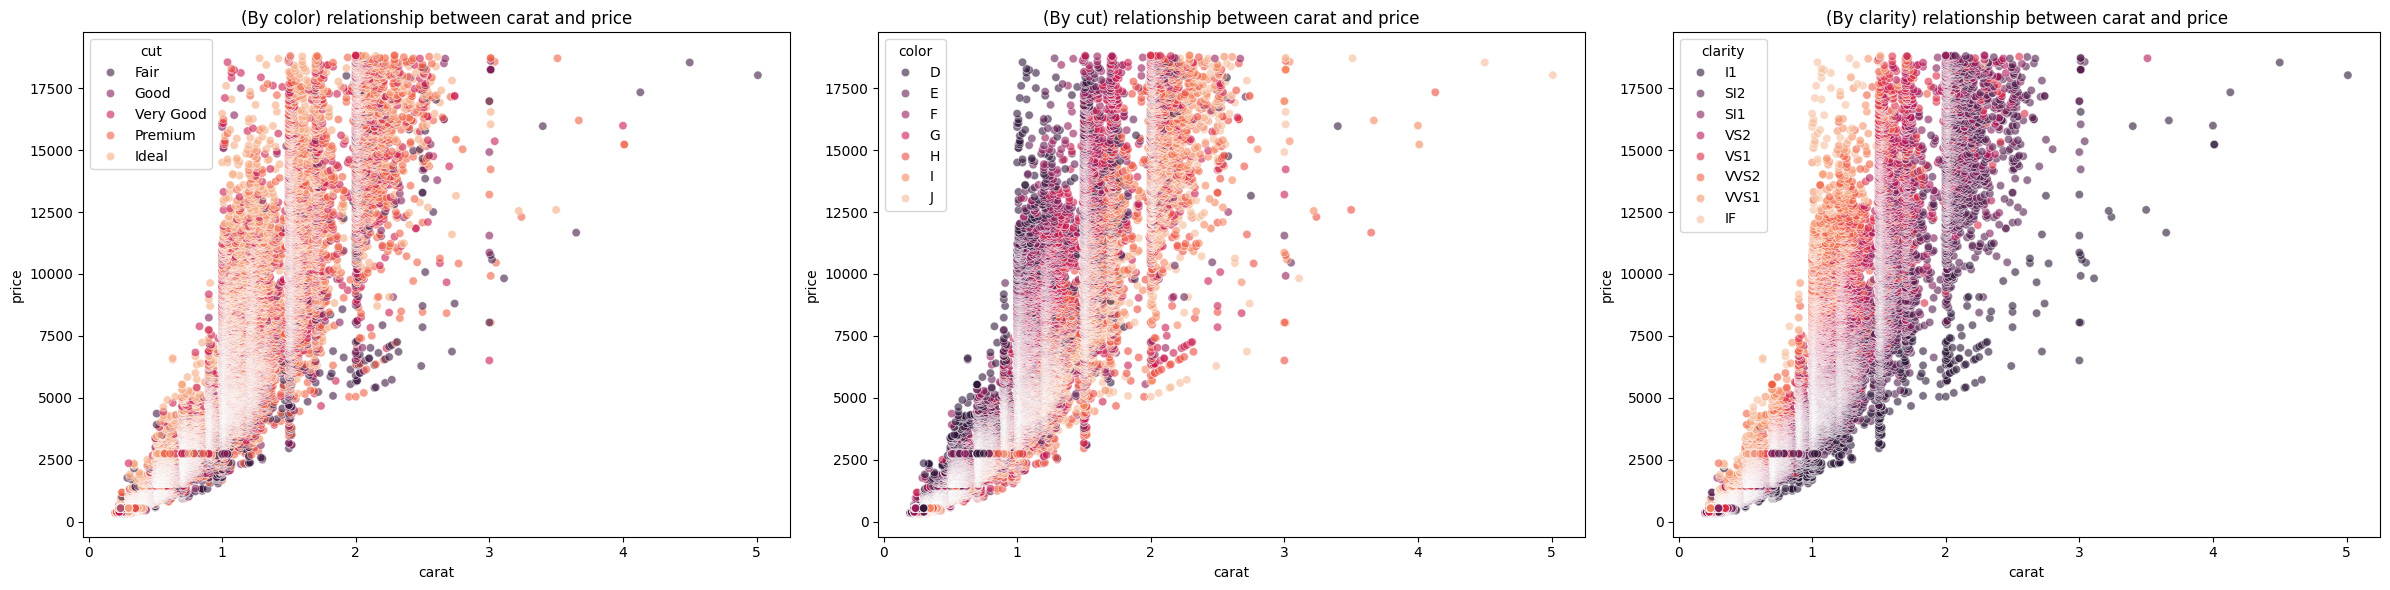

In [57]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='carat', y='price', hue='cut', hue_order=order[0], palette='rocket', alpha=0.6)
plt.title('(By color) relationship between carat and price')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='carat', y='price', hue='color', hue_order=order[1], palette='rocket', alpha=0.6)
plt.title('(By cut) relationship between carat and price')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='carat', y='price', hue='clarity', hue_order=order[2], palette='rocket', alpha=0.6)
plt.title('(By clarity) relationship between carat and price')

plt.tight_layout()
plt.show()

1. cut
- 유의미한 정보를 찾지 못했습니다.


2. color
- 1캐럿에서 가격이 점점 높아질수록 제일 좋은 색상인 D가 많이 분포되어 있는 것을 볼 수 있습니다.

3. clarity
- 1캐럿에서 가격이 점점 높아질수록 제일 좋은 투명도인 IF가 많이 분포되어 있는 것을 볼 수 있습니다.


위 그래프를 통해 실제로 가격과 두가지 범주형 변수(color, clarity) 간의 상관관계가 어느 정도는 있다는 것을 알 수 있습니다.  
또한, 앞서 확인한 것처럼 캐럿(carat)이 높아질수록 가격(price)이 상승하는 경향을 볼 수 있습니다.

# 결론
1. 다이아몬드 가격은 주로 물리적 크기(carat, x, y, z)에 의해 결정됩니다.  
2. 품질 관련 범주형 변수(cut, color, clarity)는 상대적으로 가격에 끼치는 영향력이 낮습니다.